Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

# DESCRIPTION ABOUT THE PROBLEM STATEMENT;



The problem statment basically requires to identify the total sales generated from the differernt sources like tv,radio and 
newspaper and the contributions of them in total revenue generated individually.since this is a contineous data set so regression 
analysis is the best way to predict the sales.


# Importing libraries

In [1]:
#importing basic libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as ms

import warnings
warnings.filterwarnings('ignore')



In [2]:
#import datasets
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#checking the shape
print('Number of rows and columns are:',df.shape)

Number of rows and columns are: (200, 5)


# DESCRIPTION ABOUT THE FEATURES:

- NO OF ROWS = 200
- NO OF COLUMNS = 5
- FEATURES : UNNAMED,TV,RADIO,NEWSPAPER
- TARGET OR LABEL = SALES
. The above features are the source of spreading advertisement which helps in revenue generation for the product


In [4]:
#checking the null value;

df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

obesrvation:
    - no null value in any columns

In [5]:
#dropping the unnessary features.
df = df.drop(columns='Unnamed: 0',axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
#checking the data type of the columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [7]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [8]:
#collecting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


observation:

    - all the features and targets have 200 counts.
    - no missing values
    - jump in the value of max value in newspaper is more than 2.5 times from 75% while the jump is less than equal to 
      double from 25% to 50% and 50% to 75%

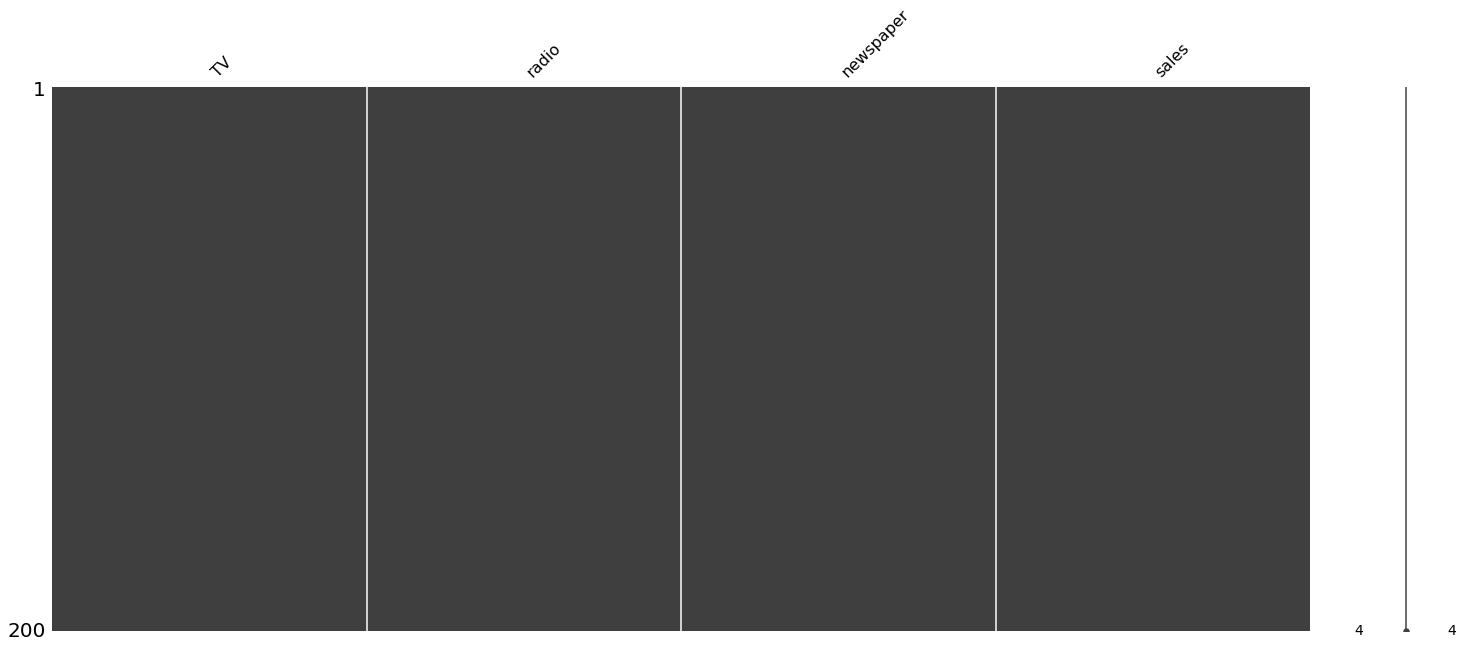

In [10]:
#plotting missing number confirmation
ms.matrix(df);

Above graph clearly justify that no values are missing in any columns

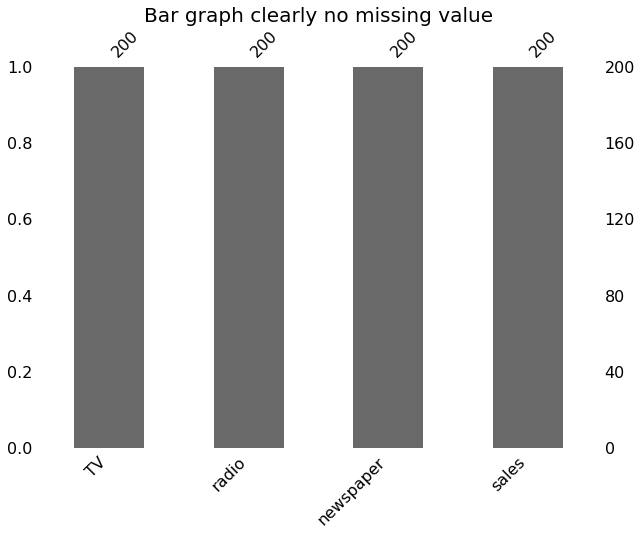

In [11]:
ms.bar(df,figsize=(10,7))
plt.title("Bar graph clearly no missing value",size=20);

# checking correlation amomg features ans sales

In [12]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

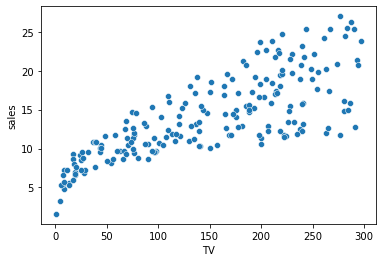

In [13]:
sns.scatterplot(x='TV',y="sales",data=df);

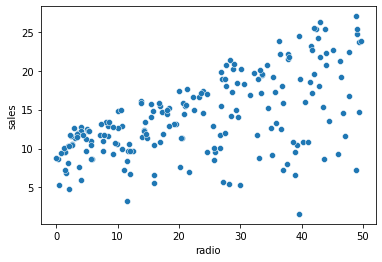

In [14]:
sns.scatterplot(x='radio',y="sales",data=df);

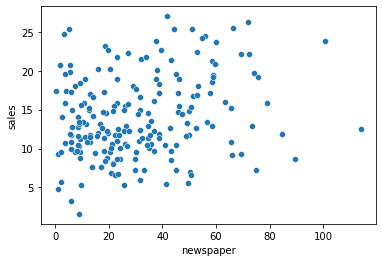

In [15]:
sns.scatterplot(x='newspaper',y="sales",data=df);

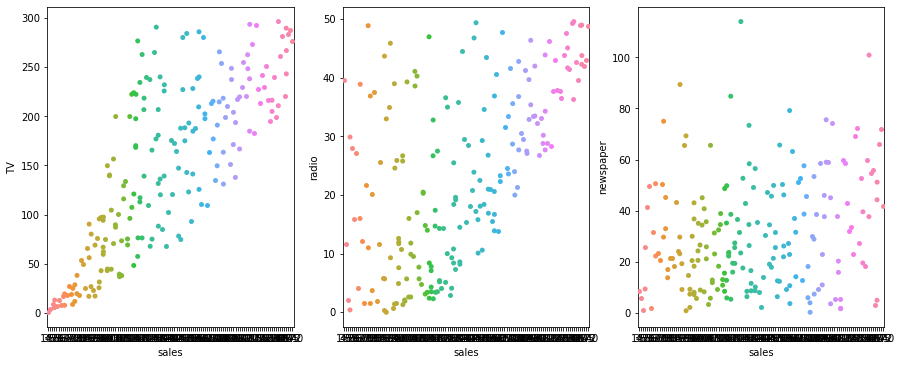

In [18]:
#relationship between independent variables and their categories

plt.figure(figsize = (15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()

# We observe that as the advertisement in radio  and tv increases sales also shows a positive growth but advertisement in the newspaper has not perform much growth.

-

<Figure size 1080x720 with 0 Axes>

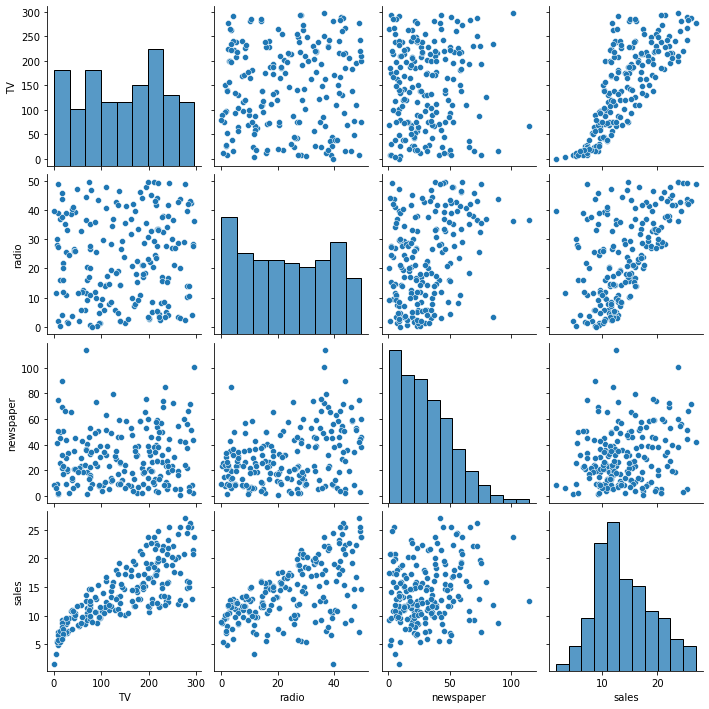

In [19]:
plt.figure(figsize = (15,10))
sns.pairplot(df)
plt.show();

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


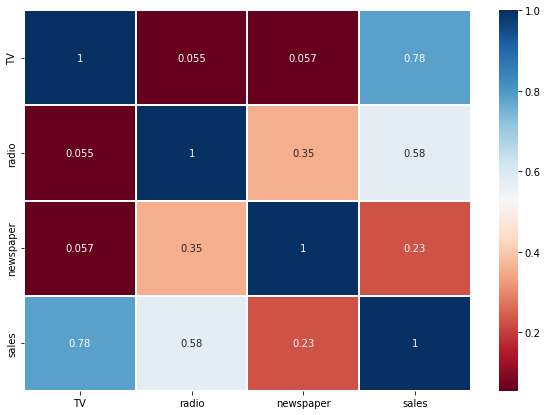

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), cmap = 'RdBu',linewidth=2,annot = True)
plt.show()

observation;
1. TV and radio has a strong relationship with sales
2. newspaper has not so much srongly correlated with sales
3. features has no strong relationship among themselves which is good for model building.

# checking skewness of the data

In [22]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

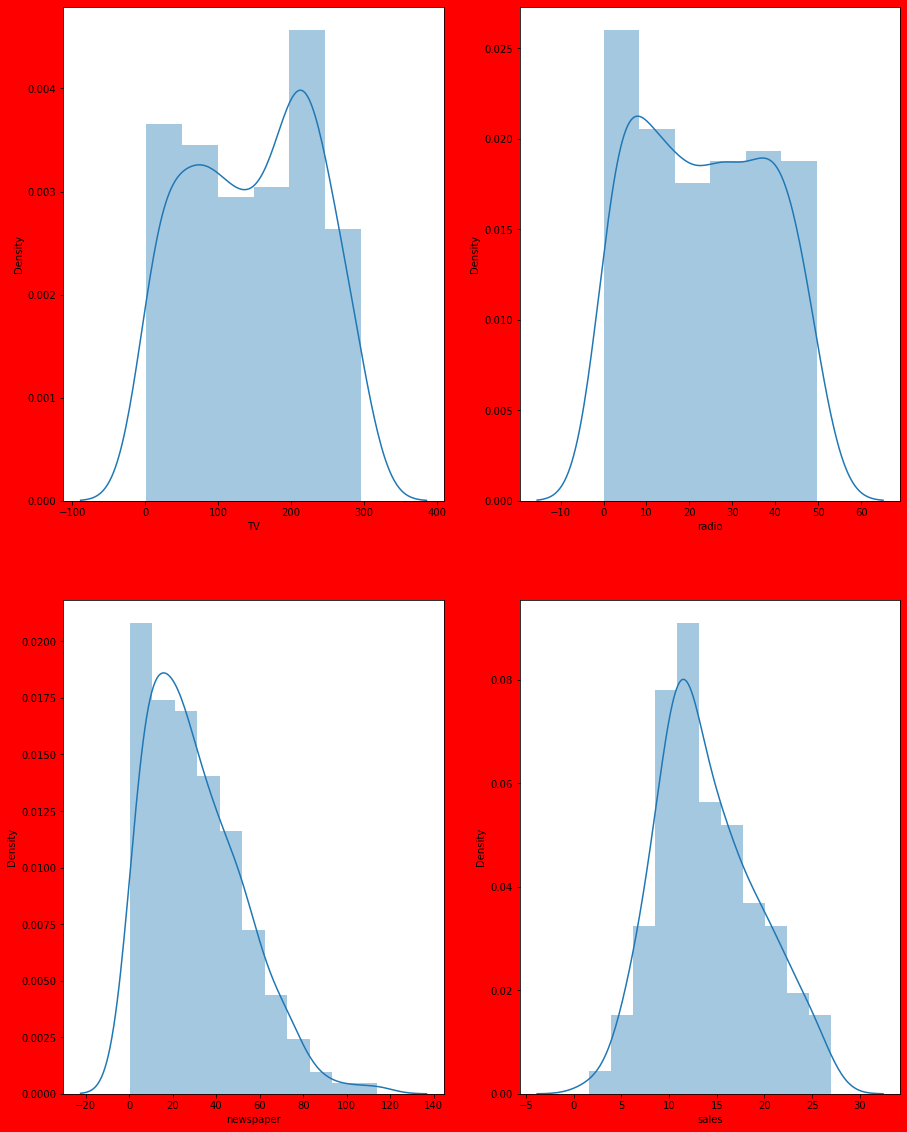

In [23]:
plt.figure(figsize=(15,20),facecolor="red")
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# skewness looks good and hence strong evidence not been concluded so look for other plot to search skweness if any.

# Applying boxplot to check outliers

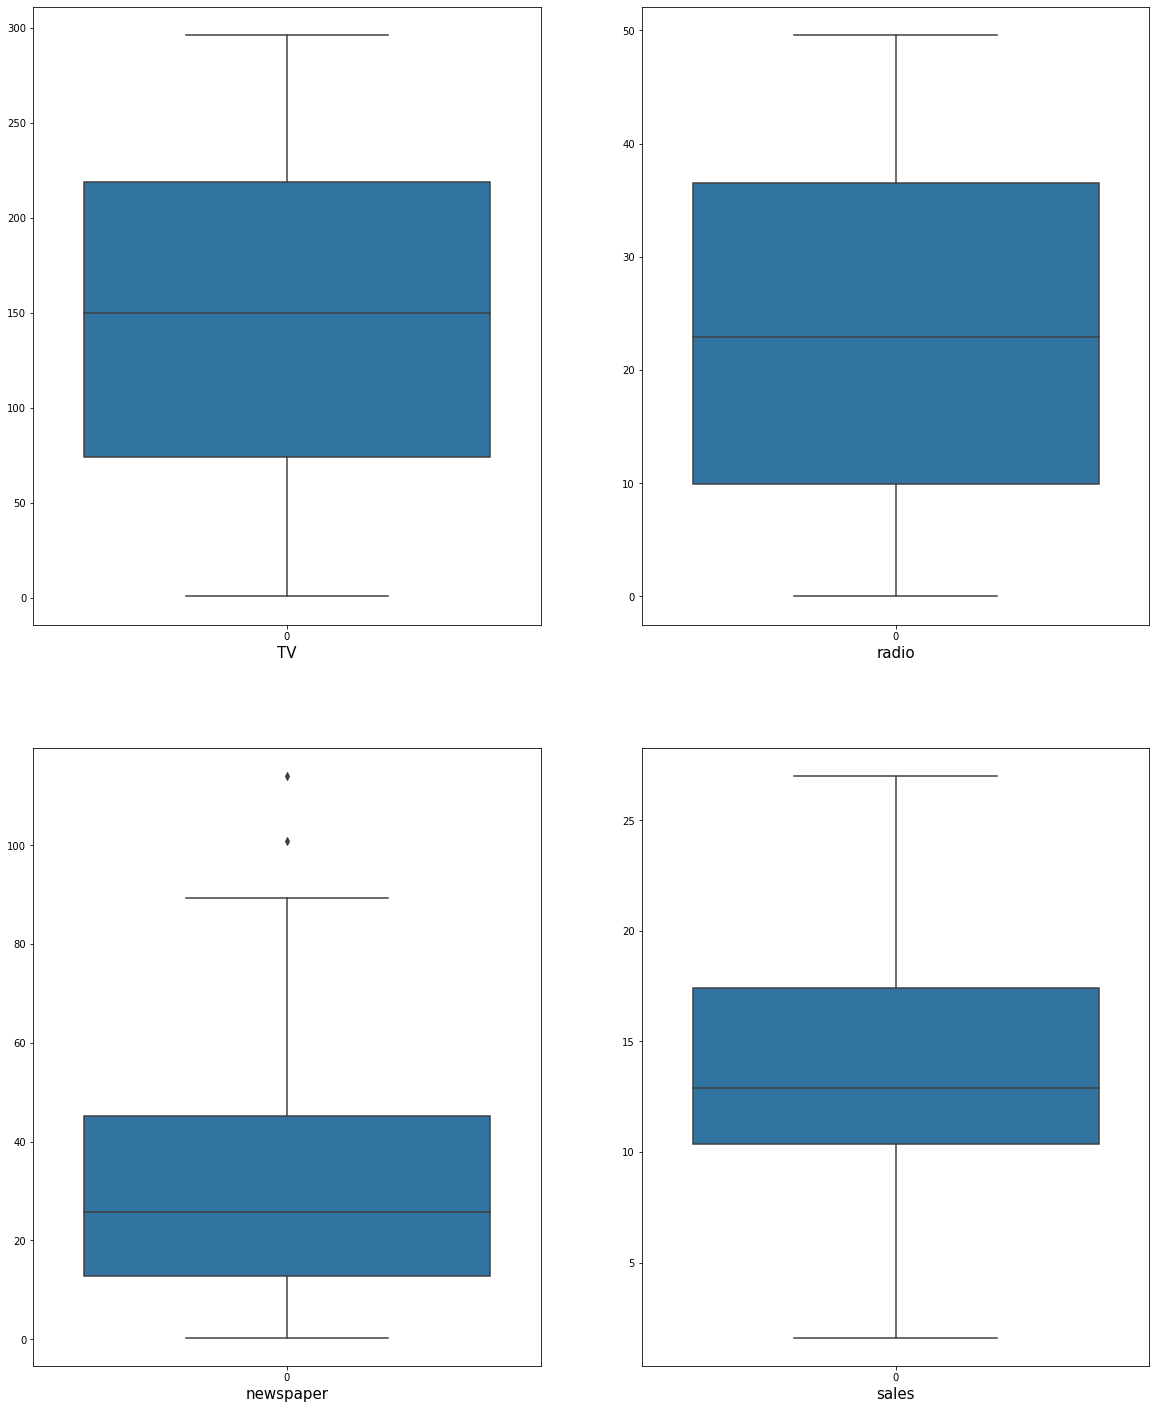

In [24]:
plt.figure(figsize=(20,25))
graph = 1
for column in df:
    if graph<=4:
        plt.subplot(2,2,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()


# only news paper column has outliers which can be removed easily.

In [25]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1

In [26]:
Newspaper = (q3.newspaper + (1.5*iqr.newspaper))
print('Newspaper')
index = np.where(df['newspaper']>Newspaper)
df = df.drop(df.index[index])

print(df.shape)
df.reset_index().head()

Newspaper
(198, 4)


,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


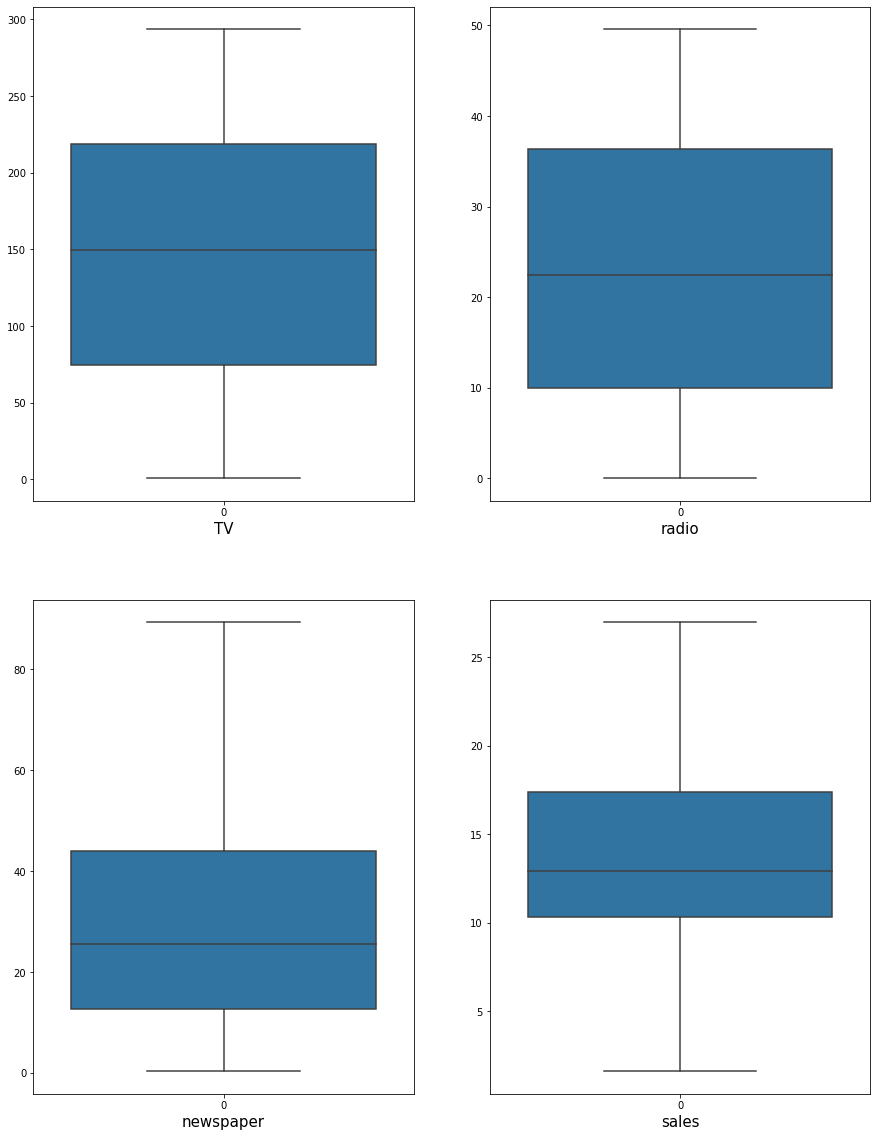

In [27]:
plt.figure(figsize=(15,20))
graph = 1
for column in df:
    if graph<=4:
        plt.subplot(2,2,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()


# outliers has been removed completely

In [28]:
df.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [29]:
#splitting the data into x and y

x = df.drop('sales',axis=1)
y = df['sales']

In [30]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [31]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
#scaling the features
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x_scaled.shape

(198, 3)

In [37]:
y.shape

(198,)

# checking multicollinearity

In [38]:
#using variance inflation factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.003863,TV
1,1.137887,radio
2,1.137631,newspaper


# As we observe that vif factor for each columns is less than 5 so we can say that multicollinearity may not be present in our features.

In [39]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y ,test_size=0.2, random_state=7)

now our model is ready for training..

In [40]:
#Defining function to fit and check model metrics

def reg(model,x_train,y_train):
    
    #Train models
    model.fit(x_train,y_train)
    
    #Predict x_test
    pred = model.predict(x_test)
    
    #Calculating RMSE score. lower the RMSE is better
    RMSE = mean_squared_error(y_test, pred, squared = False)
    print('RMSE Score is: ', RMSE)
    
    #Calculate R2 score
    R2 = r2_score(y_test, pred, multioutput = 'variance_weighted') * 100
    print('R2 score is: ', R2)
    
    #Calculate cross validation score
    cv = (cross_val_score(model, x, y, cv = 5).mean())*100
    print('Cross Validation Score is: ', cv)
    
    #Calculate the difference between R2 and Cross validation. Lower is better
    var = R2 - cv
    print('R2 - Cross Validation score is: ', var) 

In [41]:
#applying Linear regression to function
model = LinearRegression()
reg(model,x_train,y_train)

RMSE Score is:  1.711290080827877
R2 score is:  90.72259879826814
Cross Validation Score is:  88.53605756683912
R2 - Cross Validation score is:  2.1865412314290182


In [42]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
reg(model,x_train,y_train)

RMSE Score is:  0.7427964727972246
R2 score is:  98.25209132582104
Cross Validation Score is:  97.50064025197311
R2 - Cross Validation score is:  0.7514510738479316


In [43]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
reg(model,x_train,y_train)

RMSE Score is:  1.3627178724886526
R2 score is:  94.11710664288589
Cross Validation Score is:  95.15274905338408
R2 - Cross Validation score is:  -1.0356424104981983


In [44]:
#knn method
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
reg(model,x_train,y_train)

RMSE Score is:  1.4864588793505187
R2 score is:  93.00021225301826
Cross Validation Score is:  90.85884467177155
R2 - Cross Validation score is:  2.141367581246712


In [45]:
#XGBOOST METHOD
import xgboost as xgb
model = xgb.XGBRegressor()
reg(model,x_train,y_train)

RMSE Score is:  0.7753030012610452
R2 score is:  98.09575860253759
Cross Validation Score is:  96.90907247774507
R2 - Cross Validation score is:  1.1866861247925158


In [46]:
#Gradient boosted trees
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
reg(model,x_train,y_train)


RMSE Score is:  0.6768900168988874
R2 score is:  98.5485058497015
Cross Validation Score is:  97.80829328019823
R2 - Cross Validation score is:  0.7402125695032709


In [47]:
#ADABOOST MODEL
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
reg(model,x_train,y_train)


RMSE Score is:  1.0072505075582863
R2 score is:  96.78593939391807
Cross Validation Score is:  95.43424820049168
R2 - Cross Validation score is:  1.3516911934263902


# AS WE OBSERVE THAT :
    1. best result obtained from random forest REGRESSOR and Gradientboostingregressor
       as as there cross validation report is better than other models and also R2-cross 
        validation score is also lower which is healthy sign for the model

# FEATURES SELECTION FOR THE BEST MODEL

# we have observe above that Tv and radio has a good and strong positive relationship with the target variables and newspaper has not so much strong correlation but since features are very less and newspaper also show good correlation although so we decideto keep all the features for model building.

# HYPERTUNING BY USING GRIDSEARCHCV METHOD

# applying on adaboost method for best result

In [49]:
from sklearn.model_selection import GridSearchCV 

In [51]:
params = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

grid = GridSearchCV(AdaBoostRegressor(), params, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [52]:
grid.best_params_

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 200, 'random_state': 21}

In [53]:
models = grid.best_estimator_
model.fit(x_train,y_train)

AdaBoostRegressor()

In [54]:
reg(models, x_train, y_train)

RMSE Score is:  0.8802900668735797
R2 score is:  97.54511769956919
Cross Validation Score is:  95.81770933126768
R2 - Cross Validation score is:  1.7274083683015107


# slight improvement in the results as compared to previous results

# Lets apply hypertuning model in  the Random forest 

In [75]:
parameters = {'criterion':['mse',"mae"],'max_features':["auto","sqrt",'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [84]:
rf = RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)
rfs = r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("cross val score:",rfc*100)


R2 score: 98.47256314923288
cross val score: 97.73480291636088


# random forest model provides the best result as evident from the score .lets save it.

# SAVING THE MODEL

In [85]:
import pickle
filename = 'adv.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [86]:
loaded_model = pickle.load(open('adv.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

98.47256314923288


In [88]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,13.16,13.05,5.101,15.123,11.133,8.016,15.2975,11.422,12.163,12.449,...,14.3995,17.059,16.709,16.0445,13.074,5.925,23.523,9.912,12.377,22.308
original,13.16,13.05,5.101,15.123,11.133,8.016,15.2975,11.422,12.163,12.449,...,14.3995,17.059,16.709,16.0445,13.074,5.925,23.523,9.912,12.377,22.308


#          ======   ASSIGNMENT FINISHED   ==========